<h1>Data Analysis</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('boardgames_ranks.csv')
df.head()

,id,name,yearpublished,rank,bayesaverage,average,usersrated,abstracts_rank,cgs_rank,childrensgames_rank,familygames_rank,partygames_rank,strategygames_rank,thematic_rank,wargames_rank
0,224517,Brass: Birmingham,2018,1,8.41743,8.60008,44039,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,161936,Pandemic Legacy: Season 1,2015,2,8.38364,8.53060,52833,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
2,174430,Gloomhaven,2017,3,8.36326,8.59762,61363,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN
3,342942,Ark Nova,2021,4,8.33370,8.53851,40777,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
4,233078,Twilight Imperium: Fourth Edition,2017,5,8.24294,8.60631,23096,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN


In [3]:
print(f"There's {len(df)} different boardgames in this database.")

There's 152705 different boardgames in this database.


Check if the "id" column is made of unique values to transform it into the index.

In [4]:
len(df.id.values) == len(set(df.id.values))

True

In [5]:
df.set_index('id', inplace=True)
df.head()

,name,yearpublished,rank,bayesaverage,average,usersrated,abstracts_rank,cgs_rank,childrensgames_rank,familygames_rank,partygames_rank,strategygames_rank,thematic_rank,wargames_rank
id,,,,,,,,,,,,,,
224517,Brass: Birmingham,2018,1,8.41743,8.60008,44039,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
161936,Pandemic Legacy: Season 1,2015,2,8.38364,8.53060,52833,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
174430,Gloomhaven,2017,3,8.36326,8.59762,61363,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN
342942,Ark Nova,2021,4,8.33370,8.53851,40777,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
233078,Twilight Imperium: Fourth Edition,2017,5,8.24294,8.60631,23096,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN


Take care of the NaN values.

In [6]:
df.fillna(0, inplace=True)
df.isnull().any().any()

False

In [7]:
df.yearpublished.value_counts()

yearpublished
 0       11378
 2019     7727
 2018     7213
 2020     7165
 2021     6980
         ...  
 1575        1
-700         1
 1807        1
 1202        1
 1613        1
Name: count, Length: 336, dtype: int64

In [13]:
print(f"There's {len(df[df.yearpublished == 0])} boardgames that were publised in an unknown year.")

There's 11378 boardgames that were publised in an unknown year.


Let's check how many boardgames were invented in the BC era and which one is the oldest boardgame.

In [7]:
old_bgs = df[df.yearpublished < 0]
print(len(old_bgs))
old_bgs[old_bgs.yearpublished == old_bgs.yearpublished.min()]

22


,name,yearpublished,rank,bayesaverage,average,usersrated,abstracts_rank,cgs_rank,childrensgames_rank,familygames_rank,partygames_rank,strategygames_rank,thematic_rank,wargames_rank
id,,,,,,,,,,,,,,
2399,Senet,-3500,10078,5.56963,5.82846,831,898.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The oldest game is called Senet and it was invented in the year 3500 BC.

Now, let's check out how many boardgames have come out and are gonna come out since 2020. Also let's take a look at the most recent boardgames included on this data.

In [8]:
recent_bgs = df[df.yearpublished > 2020]
print(f"Boardgames published since 2020: {len(recent_bgs)}.")
recent_bgs[recent_bgs.yearpublished == recent_bgs.yearpublished.max()]

Boardgames published since 2020: 23667.


,name,yearpublished,rank,bayesaverage,average,usersrated,abstracts_rank,cgs_rank,childrensgames_rank,familygames_rank,partygames_rank,strategygames_rank,thematic_rank,wargames_rank
id,,,,,,,,,,,,,,
217711,Kingdom Death: Monster – Ivory Dragon Expansion,2026,0,0.0,8.25,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219251,Kingdom Death: Monster – Super Survivors Promo...,2026,0,0.0,8.80,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279876,Template of War,2026,0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304759,Medieval Royale,2026,0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304871,Robot Like You,2026,0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325429,Citytrip Paris,2026,0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
331318,Citytrip Junior,2026,0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404324,Darkwoods,2026,0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
411725,Sons of Heracles,2026,0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
years = list(set(df.yearpublished))
years.remove(0)
years.sort()

In [10]:
years_counts = {}
for year in years:
    counts = len(df[df.yearpublished == year])
    years_counts[year] = counts
years_counts[2026]

10

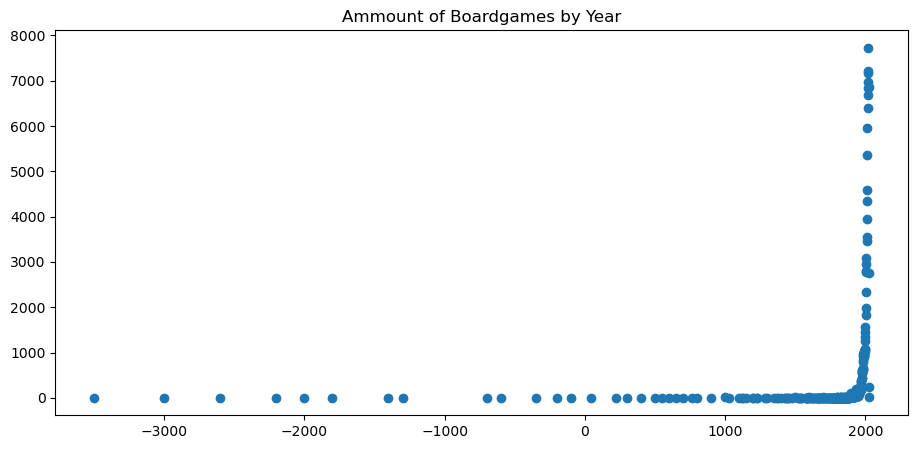

In [11]:
plt.figure(figsize=(11, 5))
plt.scatter(years_counts.keys(), years_counts.values())
plt.title('Ammount of Boardgames by Year');

Boardgame publishing has exploded in recent times compared to the past. Let's try to zoom into more recent years to see the growth more detailed.

In [12]:
recent_yc = {}
for k,v in years_counts.items():
    if k > 1900:
        recent_yc[k] = v
    else:
        pass
recent_yc[2026]

10

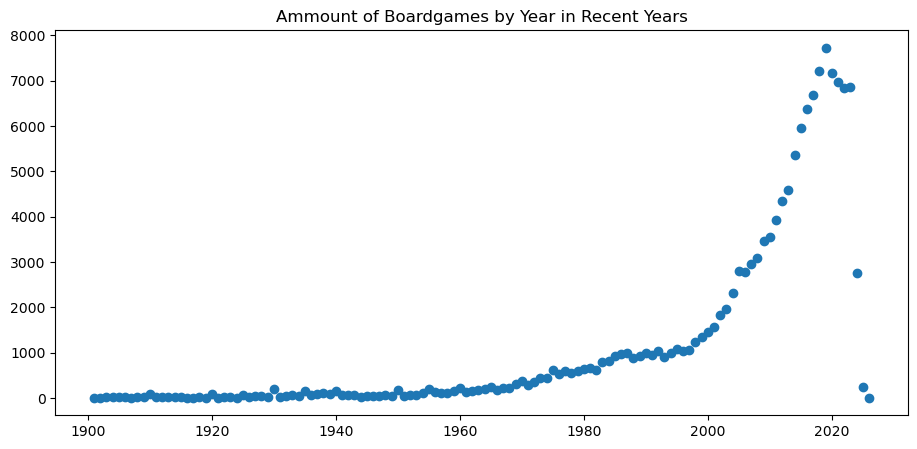

In [13]:
plt.figure(figsize=(11, 5))
plt.scatter(recent_yc.keys(), recent_yc.values())
plt.title('Ammount of Boardgames by Year in Recent Years');

Find the year with the highest ammount of published boardgames.

In [14]:
max_ammount = np.max(list(years_counts.values()))
max_ammount

7727

In [15]:
max_year = [k for k, v in years_counts.items() if v == max_ammount]
print(f"The year with the highest published boardgames is {max_year[0]} with {max_ammount} of games published.")

The year with the highest published boardgames is 2019 with 7727 of games published.


Let's analyse the different genres.

In [16]:
genres_labels = df.columns[6:].to_list()
genres_labels

['abstracts_rank',
 'cgs_rank',
 'childrensgames_rank',
 'familygames_rank',
 'partygames_rank',
 'strategygames_rank',
 'thematic_rank',
 'wargames_rank']

Let's check if all these columns have no missing values or repeated values since they are rankings.

In [36]:
for genre in genres_labels:
    if len(df[genre][df[genre] > 0]) == len(set(df[genre][df[genre] > 0])):
        print(f"{genre} is complete and correct.")
    else:
        print(f"{genre} is incomplete or has repeated values.")

abstracts_rank is complete and correct.
cgs_rank is complete and correct.
childrensgames_rank is complete and correct.
familygames_rank is complete and correct.
partygames_rank is complete and correct.
strategygames_rank is complete and correct.
thematic_rank is complete and correct.
wargames_rank is complete and correct.


In [17]:
genre_counts = {}
for genre in genres_labels:
    counts = len(df[df[genre] > 0])
    print(f"{genre[:-5]}: {counts}.")
    genre_counts[genre[:-5]] = counts

abstracts: 1418.
cgs: 350.
childrensgames: 1045.
familygames: 3132.
partygames: 886.
strategygames: 2880.
thematic: 1596.
wargames: 4200.


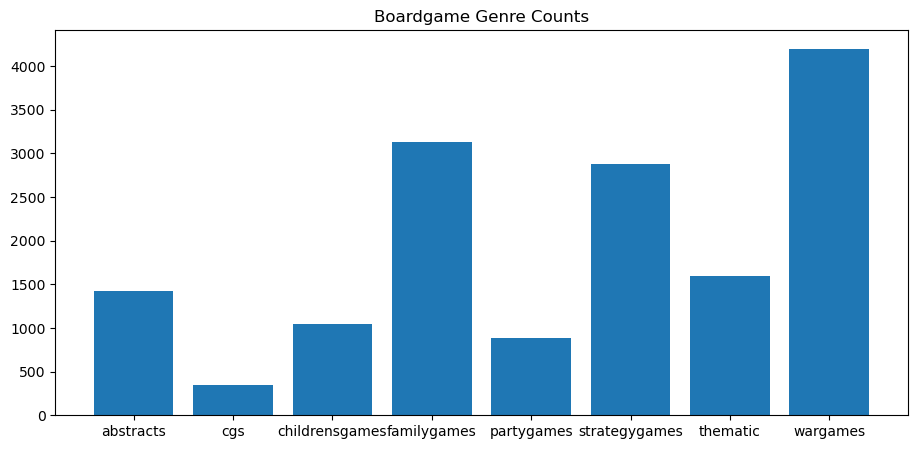

In [18]:
plt.figure(figsize=(11, 5))
plt.bar(genre_counts.keys(), genre_counts.values())
plt.title('Boardgame Genre Counts');

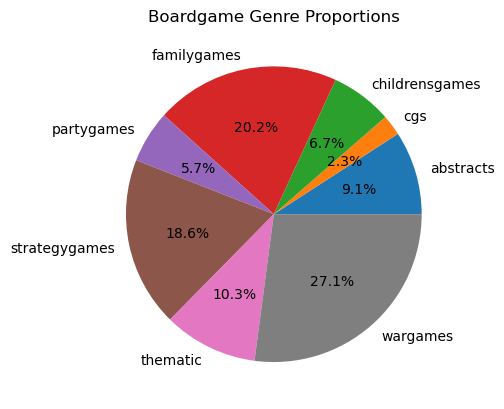

In [19]:
plt.pie(genre_counts.values(), labels=genre_counts.keys(), autopct='%1.1f%%')
plt.title('Boardgame Genre Proportions');